# Texts integrity

The goal of this notebook is to get familiar with the data and check the basic properties of the dataset.

In [1]:
from thc.utils.env import check_repository_path


REPOSITORY_DIR = check_repository_path()
RAW_DATA_DIR = REPOSITORY_DIR.joinpath("data", "raw")

## Imbalance

First, let's count the number of occurrences of individual classes across training file. Raw data directory should have the following structure:

In [2]:
!tree ../data/raw/

../data/raw/
├── test_set_only_tags.txt
├── test_set_only_text.txt
├── training_set_clean_only_tags.txt
└── training_set_clean_only_text.txt

0 directories, 4 files


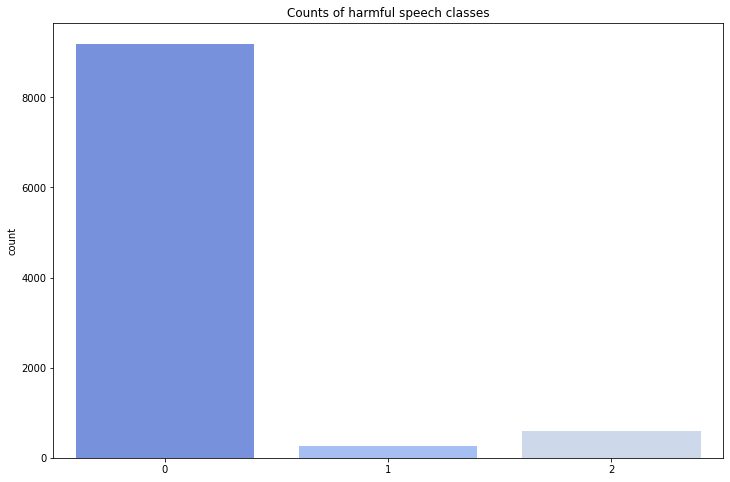

In [3]:
import codecs

import matplotlib.pyplot as plt
import seaborn as sns


sns.set_palette("coolwarm")


TRAIN_TAGS_FILE = REPOSITORY_DIR.joinpath("data", "raw", "training_set_clean_only_tags.txt")
with codecs.open(str(TRAIN_TAGS_FILE), mode="r") as file:
    train_tags = [int(tag) for tag in file]

fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x=train_tags, ax=ax)
ax.set_title("Counts of harmful speech classes")
plt.show()

It is easy to notice that we are dealing with a very imbalanced dataset, hence a careful approach to the data division strategy into training and validation sets, as well as the modeling itself, will be very important.

## Text length

Let's check how long on average are the texts that will constitute the inputs to our model.

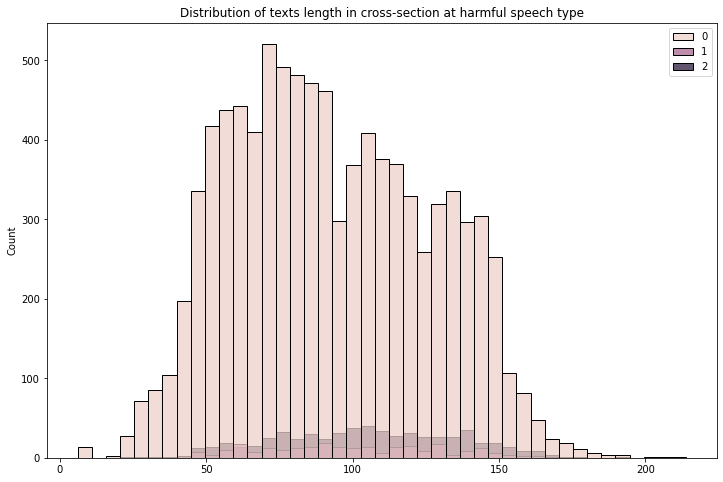

In [4]:
TRAIN_TEXT_FILE = REPOSITORY_DIR.joinpath("data", "raw", "training_set_clean_only_text.txt")
with codecs.open(str(TRAIN_TEXT_FILE), mode="r", encoding="utf-8") as file:
    train_text = file.read().splitlines()

train_text_length = [len(text) for text in train_text]

fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(x=train_text_length, hue=train_tags, ax=ax)
ax.set_title("Distribution of texts length in cross-section at harmful speech type")
plt.show()

As shown in the chart above, it is not possible to unequivocally assess whether the length of the entry correlates with the type of statement.